In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [2]:
df = pd.read_csv('Train.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [4]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [6]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
df_final = df.drop(['Name','Cabin','Embarked','Ticket','Fare','Parch','SibSp','Age'], axis=1)


In [8]:
df_final



,Survived,Pclass,Sex
PassengerId,,,
1,0,3,male
2,1,1,female
3,1,3,female
4,1,1,female
5,0,3,male
6,0,3,male
7,0,1,male
8,0,3,male
9,1,3,female


In [9]:
len(df_final)

891

In [10]:
X = df_final.drop('Survived',axis=1).copy()

In [11]:
X.head()

,Pclass,Sex
PassengerId,,
1,3,male
2,1,female
3,3,female
4,1,female
5,3,male


In [12]:
y = df_final['Survived'].copy()

In [13]:
X.dtypes

Pclass     int64
Sex       object
dtype: object

In [14]:
X_encoded = pd.get_dummies(X, columns=['Pclass','Sex'])
X_encoded

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,
1,0,0,1,0,1
2,1,0,0,1,0
3,0,0,1,1,0
4,1,0,0,1,0
5,0,0,1,0,1
6,0,0,1,0,1
7,1,0,0,0,1
8,0,0,1,0,1
9,0,0,1,1,0


In [15]:
y.unique()

array([0, 1], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

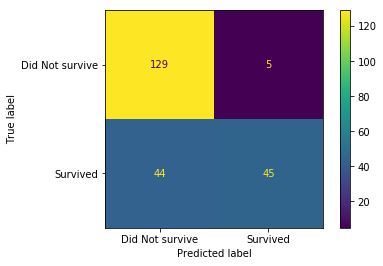

In [17]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Did Not survive","Survived"])

In [18]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

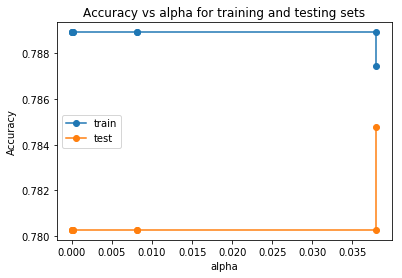

In [19]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores =  [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

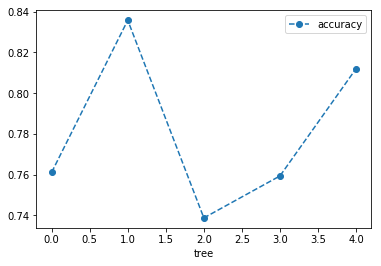

In [20]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.036)
scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
df3 = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df3.plot(x='tree',y='accuracy',marker='o', linestyle='--')


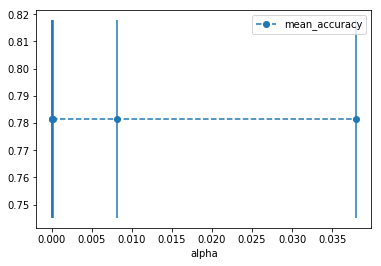

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

[Text(468.889,362.863,'Sex_female <= 0.5\ngini = 0.471\nsamples = 668\nvalue = [415, 253]\nclass = Did not Survived'),
 Text(281.333,259.188,'Pclass_1 <= 0.5\ngini = 0.307\nsamples = 439\nvalue = [356, 83]\nclass = Did not Survived'),
 Text(187.556,155.512,'Pclass_3 <= 0.5\ngini = 0.255\nsamples = 353\nvalue = [300, 53]\nclass = Did not Survived'),
 Text(93.7778,51.8375,'gini = 0.285\nsamples = 87\nvalue = [72, 15]\nclass = Did not Survived'),
 Text(281.333,51.8375,'gini = 0.245\nsamples = 266\nvalue = [228, 38]\nclass = Did not Survived'),
 Text(375.111,155.512,'gini = 0.454\nsamples = 86\nvalue = [56, 30]\nclass = Did not Survived'),
 Text(656.444,259.188,'Pclass_3 <= 0.5\ngini = 0.383\nsamples = 229\nvalue = [59, 170]\nclass = Survived'),
 Text(562.667,155.512,'Pclass_2 <= 0.5\ngini = 0.064\nsamples = 120\nvalue = [4, 116]\nclass = Survived'),
 Text(468.889,51.8375,'gini = 0.087\nsamples = 66\nvalue = [3, 63]\nclass = Survived'),
 Text(656.444,51.8375,'gini = 0.036\nsamples = 54\nva

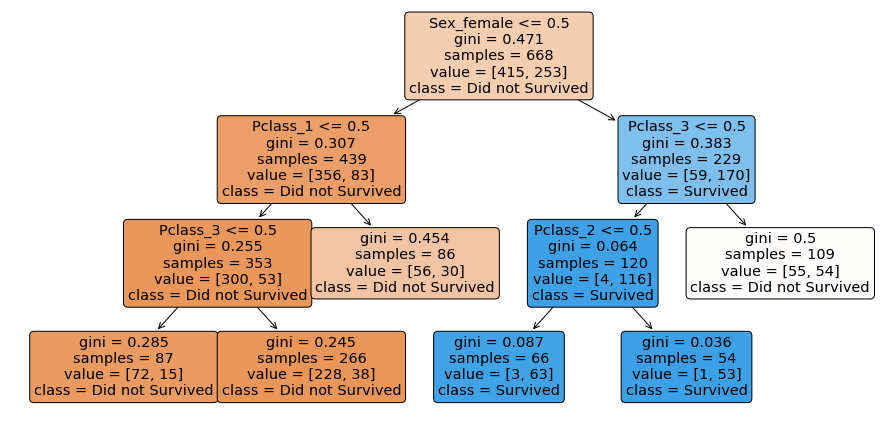

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)
plt.figure(figsize=(15,7.5))

plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Did not Survived", "Survived"], 
          feature_names=X_encoded.columns) 